<a href="https://colab.research.google.com/github/Cgaz275/PTDL/blob/munny/PTDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn Bokeh matplotlib

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.layouts import column
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CheckboxGroup, CustomJS
from bokeh.io import output_notebook

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Contents/HR_comma_sep.csv")

# Làm sạch dữ liệu
*  Kiểm tra các giá trị null
*  Kiểm tra dữ liệu trùng lắp






In [ ]:
#Kiểm tra tổng các giá trị null trong mỗi thuộc tính
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [ ]:
#Loại bỏ dữ liệu có giá trị null
df.dropna(inplace=True)

In [ ]:
#Kiểm tra trùng lắp
df.duplicated().sum()

np.int64(3008)

In [ ]:
#Loại bỏ các giá trị trùng
df.drop_duplicates(inplace=True)

# Nội dung 1 - Châu Gia Anh


In [ ]:
#Kiểm tra tổng số cột và hàng của dữ liệu : (hàng, cột)
df.shape

(11991, 10)

In [ ]:
# Các thông tin về kiểu dữ liệu, tên trường
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [ ]:
# Miêu tả các thông số cơ bản của dữ liệu
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


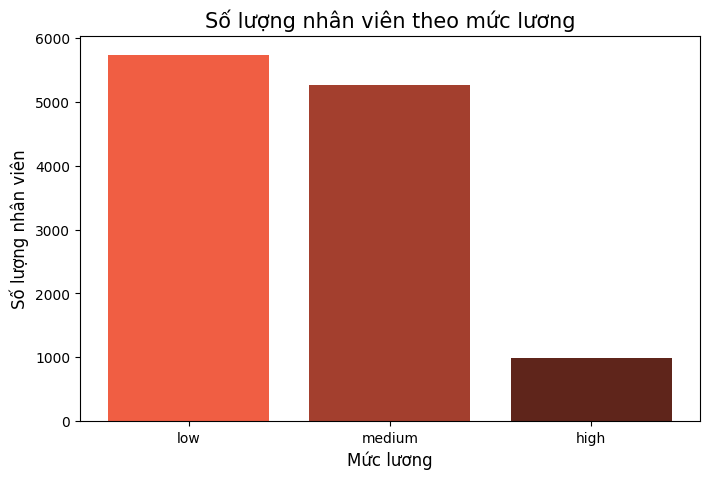

In [ ]:
# Đếm số lượng nhân viên theo từng mức lương
salary_counts = df['salary'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(salary_counts.index, salary_counts.values, color=['#F05E43', '#A33F2E', '#5F251B'])

# Thêm tiêu đề và nhãn
plt.xlabel("Mức lương", size = 12)
plt.ylabel("Số lượng nhân viên", size = 12)
plt.title("Số lượng nhân viên theo mức lương", size = 15)

# Hiển thị biểu đồ
plt.show()

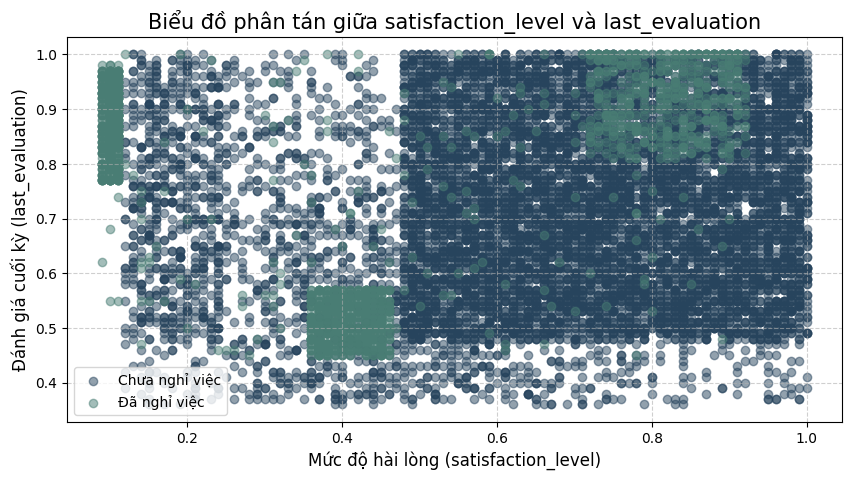

In [ ]:
# Tạo hai nhóm: Nhân viên đã nghỉ và chưa nghỉ
df_left = df[df['left'] == 1]  # Nhân viên đã nghỉ việc
df_stay = df[df['left'] == 0]  # Nhân viên vẫn làm việc

# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 5))
plt.scatter(df_stay['satisfaction_level'], df_stay['last_evaluation'],
            color='#27445D', alpha=0.5, label="Chưa nghỉ việc")
plt.scatter(df_left['satisfaction_level'], df_left['last_evaluation'],
            color='#497D74', alpha=0.5, label="Đã nghỉ việc")

# Thêm tiêu đề và nhãn
plt.xlabel("Mức độ hài lòng (satisfaction_level)", size = 12)
plt.ylabel("Đánh giá cuối kỳ (last_evaluation)", size = 12)
plt.title("Biểu đồ phân tán giữa satisfaction_level và last_evaluation", size = 15)
plt.legend()  # Hiển thị chú thích
plt.grid(True, linestyle="--", alpha=0.6)  # Thêm lưới giúp dễ nhìn

# Hiển thị biểu đồ
plt.show()

# Nội dung 2 - Đào Thị Thanh Tâm

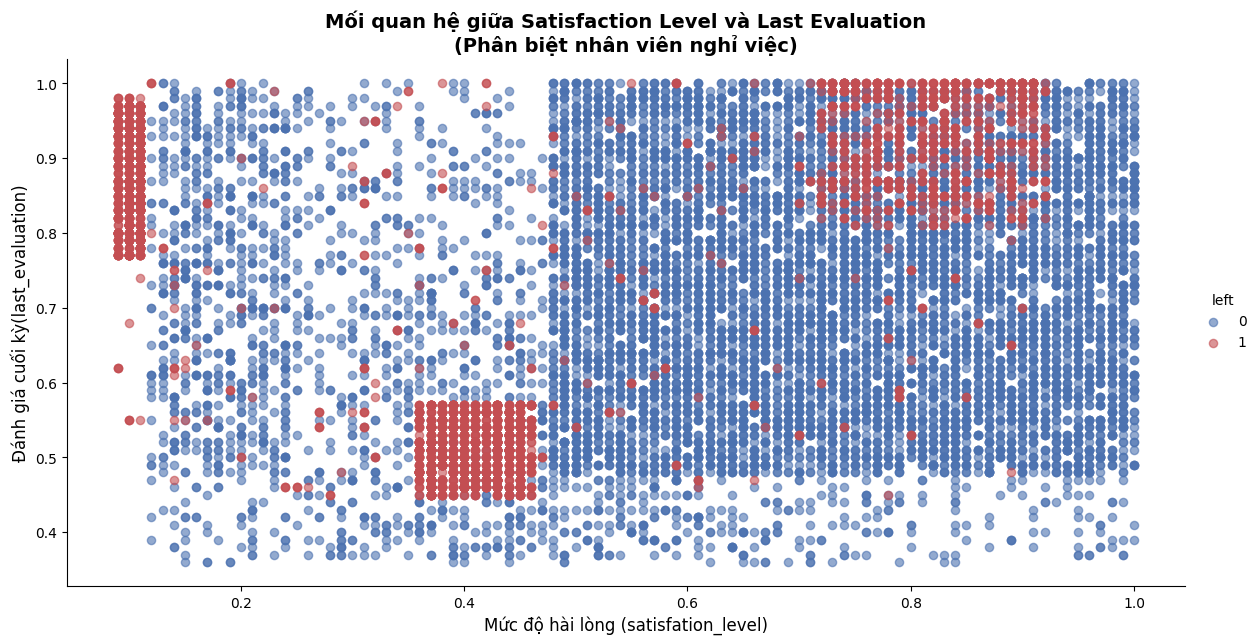

In [ ]:
pastel_palette = {0: "#4c72b0", 1: "#c44e52"}
plot = sns.lmplot(
    x="satisfaction_level",
    y="last_evaluation",
    data=df,
    fit_reg=False,  # Không vẽ đường hồi quy
    hue="left",  # Phân biệt màu theo trạng thái nghỉ việc
    palette=pastel_palette,
    height=6,  # Chiều cao biểu đồ
    aspect=2,  # Tỷ lệ khung hình (rộng hơn)
    scatter_kws={'s': 35, 'alpha': 0.6}  # Kích thước điểm (s), độ trong suốt (alpha)
)

# Tùy chỉnh nhãn và tiêu đề
plt.xlabel("Mức độ hài lòng (satisfation_level)", fontsize=12)
plt.ylabel("Đánh giá cuối kỳ(last_evaluation)", fontsize=12)
plt.title("Mối quan hệ giữa Satisfaction Level và Last Evaluation\n(Phân biệt nhân viên nghỉ việc)", fontsize=14, fontweight="bold")

# Hiển thị biểu đồ
plt.show()

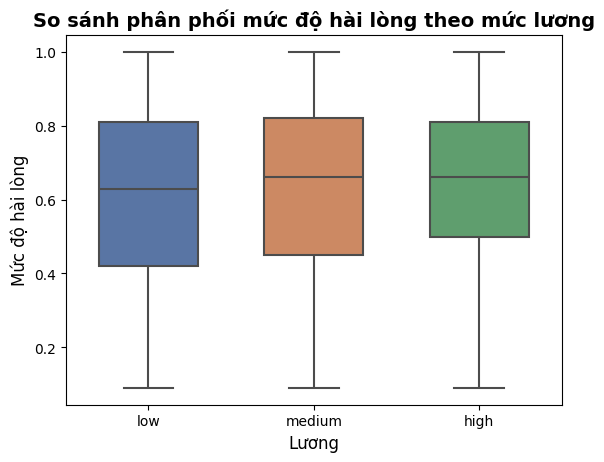

In [6]:
 # box plot
sns.boxplot(
    x='salary',
    y='satisfaction_level',
    data=df,
    hue='salary',
    palette="deep",  # Màu gradient xanh - đỏ
    width=0.6,  # Giảm độ rộng để đẹp hơn
    linewidth=1.5  # Làm nét đậm hơn
)
plt.title("So sánh phân phối mức độ hài lòng theo mức lương", fontsize=14, fontweight='bold')
plt.xlabel("Lương", fontsize=12)
plt.ylabel("Mức độ hài lòng", fontsize=12)

plt.show()


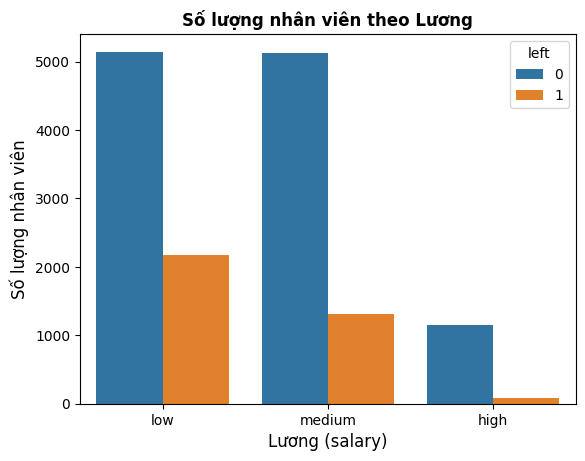

In [ ]:
# count plot
sns.countplot(x='salary', data=df, hue='left')
plt.title("Số lượng nhân viên theo Lương", fontweight='bold')
plt.xlabel("Lương (salary)", fontsize=12)
plt.ylabel("Số lượng nhân viên", fontsize=12)
plt.show()

#Nhận xét
**Biểu đồ Implot**


Đối với nhóm nhân viên rời đi:
- Nhân viên năng lực tốt nhưng mức độ hài lòng không cao có nguy cơ nghỉ việc cao
- Nhân viên có hiệu suất kém và ít hài lòng dễ bị sa thải hoặc tự nghỉ việc
- Nhân viên mới chưa đủ thời gian thể hiện năng lực, nhưng hài lòng với môi trường.

Đối với nhóm ở lại:
- Nhân viên hài lòng và có năng lực ổn định thường gắn bó lâu dài.

Xu hướng:
- Năng lực tốt nhưng không hài lòng -> dễ đánh mất nhân tài
- Năng lực thấp và hài lòng thấp -> hiệu suất kém

Biểu đồ cho thấy mối tương quan phức tạp giữa mức độ hài lòng, năng lực và tỷ lệ nghỉ việc.


**Biểu đồ boxplot**


Xu hướng:
- Mức độ hài lòng tỷ lệ thuận với mức lương -> Nhân viên lương cao mức độ hài lòng từ trung bình trở lên
- Nhóm lương thấp có phân phối lệch xuống dưới -> Nhân viên lương thấp không hài lòng

=> Lương là yếu tố quan trọng ảnh hưởng đến sự hài lòng.


**Biểu đồ countplot**


Xu hướng:
- Phân bố không đều, nhân viên ở mức lương thấp chiếm đa số, trong khi nhóm lương cao có ít nhân viên nhất.
- Giảm dần theo mức lương low > medium  > high



*Mối quan hệ từ các biểu đồ giữa mức lương, mức độ hài lòng, đánh giá năng lực và tỷ lệ nghỉ việc:*

- Nhóm lương thấp:

Chiếm đa số trong công ty nhưng có mức độ hài lòng thấp -> Dễ nghỉ việc do mức độ hài lòng thấp hoặc bị sa thải do hiệu suất công việc thấp

- Nhóm lương trung bình:

Có số lượng nhân viên vừa phải và mức độ hài lòng cao hơn nhóm lương thấp -> Nhóm ổn định, có thể đào tạo để thăng tiến

- Nhóm lương cao:

Nhóm có số lượng nhân viên ít nhất, có mức độ hài lòng cao và ổn định có thể gắn bó lâu dài

# Nội dung 3 - Dương Lê Khánh


In [ ]:
output_notebook()

### 📊 1. Biểu đồ cột: Số lượng nhân viên theo Salary ###
salary_counts = df["salary"].value_counts()

bar_source = ColumnDataSource(data={
    'salary': salary_counts.index.tolist(),
    'count': salary_counts.values.tolist()
})

bar_chart = figure(x_range=salary_counts.index.tolist(),
                   title="Số lượng nhân viên theo mức lương",
                   x_axis_label="Mức lương",
                   y_axis_label="Số lượng nhân viên",
                   width=800, height=400)

bar_chart.vbar(x='salary', top='count', width=0.6, source=bar_source, color="#FF9800")

### 🎯 2. Biểu đồ phân tán: Satisfaction Level vs Last Evaluation ###
color_map = {1: "#F50057", 0: "#00BFA5"}  # 0: Tím, 1: Xanh ngọc
colors = [color_map[left] for left in df["left"]]

scatter_source = ColumnDataSource(data={
    'x': df['satisfaction_level'],
    'y': df['last_evaluation'],
    'salary': df['salary'],
    'left': df['left'].astype(str),
    'color': colors
})

scatter_plot = figure(title="Scatter Plot: Satisfaction Level vs Last Evaluation",
                      x_axis_label="Satisfaction Level",
                      y_axis_label="Last Evaluation",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")

scatter_plot.scatter('x', 'y', source=scatter_source, size=8, color='color', alpha=0.6)

hover = HoverTool()
hover.tooltips = [("Salary", "@salary"), ("Left", "@left")]
scatter_plot.add_tools(hover)

### 🏗️ Xếp dọc 2 biểu đồ ###
layout = column(bar_chart, scatter_plot)
show(layout)


In [ ]:


output_notebook()  # Hiển thị trong Jupyter Notebook

### 🎯 Biểu đồ phân tán: Satisfaction Level vs Last Evaluation ###
color_map = {0: "#7B1FA2", 1: "#00BFA5"}  # 0: Tím, 1: Xanh ngọc

# Dữ liệu chia theo nhóm
df_0 = df[df["left"] == 0]
df_1 = df[df["left"] == 1]

source_0 = ColumnDataSource(data={'x': df_0['satisfaction_level'], 'y': df_0['last_evaluation'], 'salary': df_0['salary']})
source_1 = ColumnDataSource(data={'x': df_1['satisfaction_level'], 'y': df_1['last_evaluation'], 'salary': df_1['salary']})

scatter_plot = figure(title="Scatter Plot: Satisfaction Level vs Last Evaluation",
                      x_axis_label="Satisfaction Level",
                      y_axis_label="Last Evaluation",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")

# Thêm 2 nhóm dữ liệu với màu sắc khác nhau
scatter_0 = scatter_plot.scatter('x', 'y', source=source_0, size=8, color=color_map[0], alpha=0.6, legend_label="Chưa nghỉ việc")
scatter_1 = scatter_plot.scatter('x', 'y', source=source_1, size=8, color=color_map[1], alpha=0.6, legend_label="Đã nghỉ việc")

hover = HoverTool()
hover.tooltips = [("Salary", "@salary")]
scatter_plot.add_tools(hover)

### 🔘 Thêm Checkbox để ẩn/hiện nhóm ###
checkbox = CheckboxGroup(labels=["Chưa nghỉ việc", "Đã nghỉ việc"], active=[0, 1])  # Mặc định cả 2 đều hiển thị

# CustomJS để điều khiển visibility
callback = CustomJS(args={'scatter_0': scatter_0, 'scatter_1': scatter_1, 'checkbox': checkbox}, code="""
    scatter_0.visible = checkbox.active.includes(0);
    scatter_1.visible = checkbox.active.includes(1);
""")
checkbox.js_on_change("active", callback)

### 🏗️ Xếp dọc Checkbox và Scatter Plot ###
layout = column(checkbox, scatter_plot)
show(layout)


#Báo cáo
***Phần 1:***

Tập dữ liệu gồm 11,991 nhân viên với 10 biến (2 biến kiểu số thực, 6 biến kiểu số nguyên, 2 biến kiểu object).Các biến chính:

- satisfaction_level	Mức độ hài lòng của nhân viên (0–1)
- last_evaluation	Điểm đánh giá năng lực cuối kỳ (0–1)
- number_project	Số dự án đã tham gia trong năm
- average_montly_hours	Số giờ làm việc trung bình/tháng
- time_spend_company	Số năm làm việc tại công ty
- Work_accident	Có gặp tai nạn lao động không (0: Không, 1: Có)
- left	Đã nghỉ việc chưa (0: Ở lại, 1: Đã nghỉ)
- promotion_last_5years	Được thăng chức trong 5 năm gần đây (0: Không, 1: Có)
- sales	Phòng ban làm việc
- salary	Mức lương


Mục tiêu phân tích: phân tích mối quan hệ giữa satisfaction_level, last_evaluation, salary,... với biến mục tiêu left.

*a. Xác định yếu tố ảnh hưởng đến việc nhân viên nghỉ việc*

Kiểm tra mức độ ảnh hưởng của các biến đến quyết định nghỉ việc, đặc biệt là satisfaction_level, last_evaluation và salary.

*b. Phân nhóm nhân viên có nguy cơ nghỉ việc*

Sử dụng kỹ thuật phân cụm để xác định nhóm nhân viên có khả năng rời công ty dựa trên đặc điểm như mức lương thấp, khối lượng công việc cao hoặc không được thăng chức.

*c. Đề xuất giải pháp*

Dựa trên kết quả phân tích, đề xuất chiến lược giữ chân nhân tài, như cải thiện chế độ lương, cân bằng khối lượng công việc và nâng cao sự hài lòng của nhân viên.


***Phần 2***

